<a href="https://colab.research.google.com/github/nkrama-99/Masks-Unmasked/blob/main/SampleCodeForFaceDetectionand%20Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


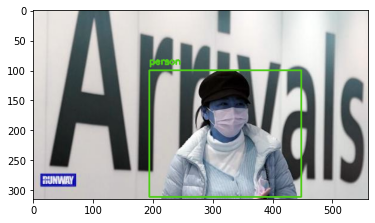

In [ ]:
#This is object detection!!

import cv2
import matplotlib.pyplot as plt
import cvlib
from cvlib.object_detection import draw_bbox
im  =  cv2.imread ('/content/drive/My Drive/APS 360/Image1.jpg')
bbox , label , conf  =  cvlib.detect_common_objects(im)
output_image = draw_bbox (im , bbox , label , conf)
plt.imshow (output_image)
plt.show()

In [ ]:
#Using pre trained RCNN For our object detection !-Method 2
import torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

model.eval()


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

1


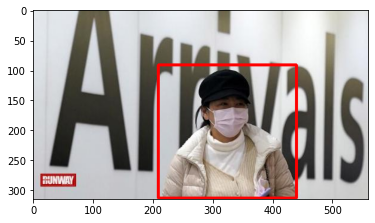

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
import numpy
img = Image.open('/content/drive/My Drive/APS 360/Image1.jpg') # Load the image

transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform

img_new = transform(img) # Apply the transform to the image

pred = model([img_new]) # Pass the image to the model


indxs = numpy.where(pred[0]['scores'].detach().numpy() >= 0.9)[0]

boxes = [pred[0]['boxes'].detach().numpy()[i] for i in indxs]

#So we got the bounding boxes!
print(len(boxes))
rects = [[(box[0],box[1]), (box[2], box[3])] for box in boxes]





img = cv2.imread('/content/drive/My Drive/APS 360/Image1.jpg')
# Need to convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
cv2.rectangle(img,
              rects[0][0],
              rects[0][1],
              color=(255, 0, 0),
              thickness=3);

plt.imshow(img)

In [ ]:
#We want face detection!!!
!pip install facenet-pytorch



     |████████████████████████████████| 1.9MB 2.8MB/s 


In [3]:
!pip install torch-mtcnn

In [4]:
from torch_mtcnn import detect_faces
from PIL import Image

image = Image.open('/content/drive/My Drive/APS 360/Image1.jpg')
bounding_boxes, landmarks = detect_faces(image)

Downloading: "https://github.com/khrlimam/mtcnn-pytorch/releases/download/0.0.1/pnet-6b6ef92b.pth" to /root/.cache/torch/hub/checkpoints/pnet-6b6ef92b.pth


Downloading: "https://github.com/khrlimam/mtcnn-pytorch/releases/download/0.0.1/rnet-b13c48bc.pth" to /root/.cache/torch/hub/checkpoints/rnet-b13c48bc.pth


Downloading: "https://github.com/khrlimam/mtcnn-pytorch/releases/download/0.0.1/onet-60cc8dd5.pth" to /root/.cache/torch/hub/checkpoints/onet-60cc8dd5.pth


In [7]:
! pip install cvlib

     |████████████████████████████████| 10.1MB 4.5MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044206 sha256=77b4ad6107b041a6fcc94be162ce7627a7f7f0dd371c253e57f9a22755b631da
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12076 sha256=c92f08d3533074bbf0219914f28f6b49360f96f4a49f8c72fbcff68d06f3cb74
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


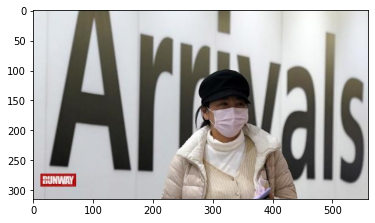

In [14]:
#THIS IS FACE DETECTION
 

import cv2
import matplotlib.pyplot as plt
import cvlib
xmin=int(bounding_boxes[0][0])
ymin=int(bounding_boxes[0][1])
xmax=int(bounding_boxes[0][2])
ymax=int(bounding_boxes[0][3])


rects = [[(xmin,ymin), (xmax, ymax)]]
img = cv2.imread('/content/drive/My Drive/APS 360/Image1.jpg')
# Need to convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
# cv2.rectangle(img,
#               rects[0][0],
#               rects[0][1],
#               color=(255, 0, 0),
#               thickness=3);

plt.imshow(img)

#WE WILL BE USING THIS!!!



# https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/


# https://www.pyimagesearch.com/2020/04/13/opencv-age-detection-with-deep-learning/

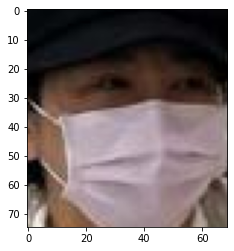

In [15]:
#NEXT STEP IS TO CROP

crop_rectangle= img[ymin:ymax, xmin:xmax]
plt.imshow(crop_rectangle )
